In [ ]:
!wget http://cb.lk/covid_19

--2020-10-12 04:58:05--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-10-12 04:58:06--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-10-12 04:58:07--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-10-12 04:58:07--  https://www.dropbox.com/s/raw/7rjw

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
TRAIN_PATH = 'covidDataset/Train'
VAL_PATH = 'covidDataset/Val'

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# Layers in NN

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss = keras.losses.binary_crossentropy,optimizer = 'adam',metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 35, 64)        0

#Training the Data

In [ ]:
#Augumenting the data to get different angle of pictures.
#This helps the Neural Network to find different kinds of features.
#It helps with overfitting the data.
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary',
)


Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
val_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary',
)

Found 60 images belonging to 2 classes.



To make sure that you have "at least steps_per_epoch * epochs batches", set the steps_per_epoch to

steps_per_epoch = X_train.shape[0]//batch_size
Then, there will be enough data for every epoch.

If you're using a tf.data.Dataset, you can also add the repeat() method, but be careful: it will loop indefinitely (unless you specify a number).

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 7,
                              epochs = 10,
                              validation_data = val_generator,
                              validation_steps = 2,
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 7s 1s/step - loss: 0.8143 - accuracy: 0.5714 - val_loss: 0.6873 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 7s 1s/step - loss: 0.6677 - accuracy: 0.5848 - val_loss: 0.6445 - val_accuracy: 0.6833
Epoch 3/10
7/7 [==============================] - 7s 969ms/step - loss: 0.5227 - accuracy: 0.7723 - val_loss: 0.3704 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 7s 977ms/step - loss: 0.2811 - accuracy: 0.8750 - val_loss: 0.0916 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 7s 975ms/step - loss: 0.2265 - accuracy: 0.9062 - val_loss: 0.0648 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.3365 - accuracy: 0.9196 - val_loss: 0.2369 - val_accuracy: 0.9000
Epoch 7/10
7/7 [==============================] - 7s 1s/step - loss: 0.2116 - accuracy: 0.915

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


In [ ]:
acc=history.history['accuracy']

In [ ]:
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

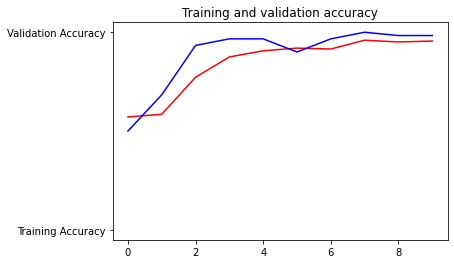

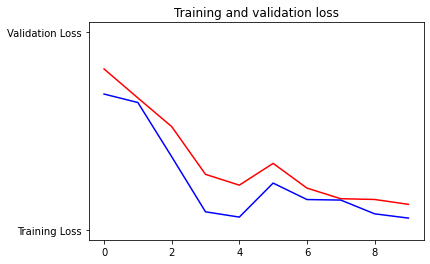

In [ ]:
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  a = np.argmax(classes,axis = 1)
  print(a[0])
  
  if a[0]==0:
    print(fn + " Has Corona")
    
  else:
    print(fn + "Does not have corona")
 

Saving corona.jpg to corona (2).jpg
0
corona.jpg Has Corona
